<a href="https://colab.research.google.com/github/EutruTepit/BigData2022/blob/main/%5BAula_11%5D_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão

In [53]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/EutruTepit/BigData2022/main/datasets%20bdda/petr4.csv')

df.head()

,DATA,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME
0,2020-05-11,18.30,18.15,-1.79,18.11,18.93,1.190000e+09
1,2020-05-08,17.74,18.48,5.96,17.71,18.58,1.510000e+09
2,2020-05-07,17.75,17.44,0.93,17.35,17.87,1.420000e+09
3,2020-05-06,17.87,17.28,-3.68,17.28,18.06,1.180000e+09
4,2020-05-05,17.90,17.94,3.22,17.87,18.48,1.360000e+09


In [54]:
novo_df = df[ ['DATA', 'FECHAMENTO'] ]

novo_df.sort_values(by=['DATA'], inplace=True)

novo_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,DATA,FECHAMENTO
349,2018-12-07,23.32
348,2018-12-10,22.07
347,2018-12-11,21.93
346,2018-12-12,21.94
345,2018-12-13,22.00


In [55]:
janela = 3
valores = novo_df['FECHAMENTO'].values

estrutura = {'c1': [], 'c2': [], 'c3':[]}

for i, valor in enumerate(valores):
  ref = i + janela
  
  if ref >= len(valores): break

  estrutura['c1'].append( valores[ref - 2] )
  estrutura['c2'].append( valores[ref - 1] )
  estrutura['c3'].append( valores[ref] )

df_tratado = pd.DataFrame(estrutura)

df_tratado.head()

,c1,c2,c3
0,22.07,21.93,21.94
1,21.93,21.94,22.00
2,21.94,22.00,21.70
3,22.00,21.70,21.53
4,21.70,21.53,20.72


## Visualizar

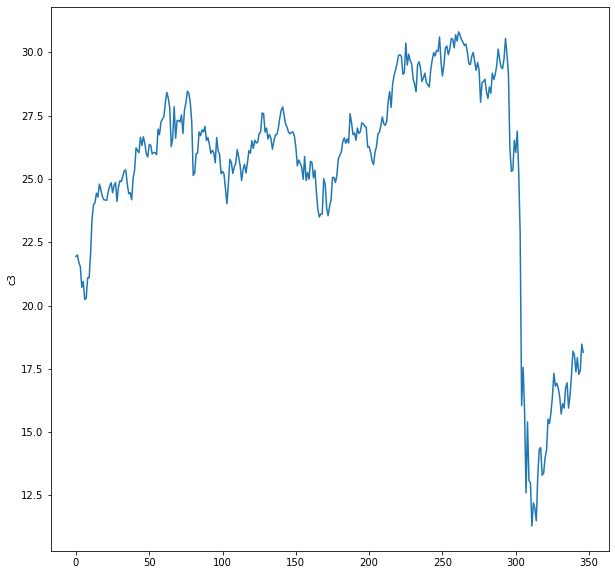

In [56]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 10)
sns.lineplot(data=df_tratado, x=range(0, len(df_tratado['c3'])), y='c3');
#sns.lineplot(data=df_tratado, x=range(0, len(df_tratado['c2'])), y='c2');
#sns.lineplot(data=df_tratado, x=range(0, len(df_tratado['c1'])), y='c1');

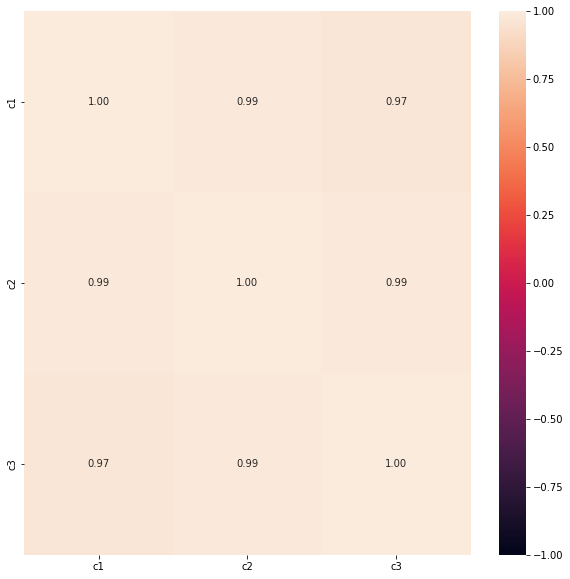

In [57]:
sns.heatmap(df_tratado.corr(), vmin=-1, annot=True, fmt=".2f");

In [63]:
df_menor = df_tratado.iloc[:290]
#tamanho_treino = round(len(df_tratado['c3']) * 0.9)
tamanho_treino = round(290 * 0.7)

df_treino = df_tratado.iloc[:tamanho_treino]
df_teste = df_tratado.iloc[tamanho_treino:]

### Realizar a regressão (Arvore)

In [69]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5)

dtr.fit(df_treino[ ['c1', 'c2'] ], df_treino['c3'])

DecisionTreeRegressor(max_depth=5)

In [70]:
pred_treino = dtr.predict(df_treino[ ['c1', 'c2'] ])
pred_teste = dtr.predict(df_teste[ ['c1', 'c2'] ])

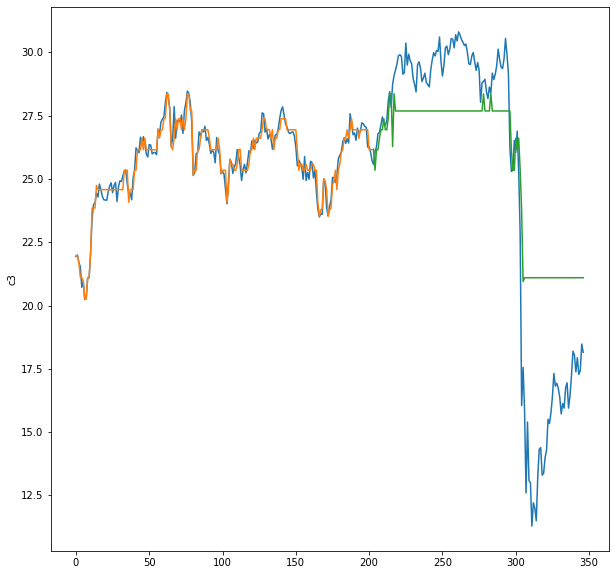

In [71]:
sns.lineplot(data=df_tratado, x=range(0, len(df_tratado['c3'])), y='c3');
sns.lineplot(x=range(0, len(pred_treino)), y=pred_treino);
sns.lineplot(x=range(tamanho_treino, len(pred_teste)+tamanho_treino), y=pred_teste);

### Avaliação

In [74]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true=df_teste['c3'], y_pred=pred_teste)

rmse = mse ** (1/2)

rmse

3.5904271357865696

70/30 = 3.8807366965168244

90/10 = 2.9760582751590836

290 dados 70/30 = 3.518111472556453

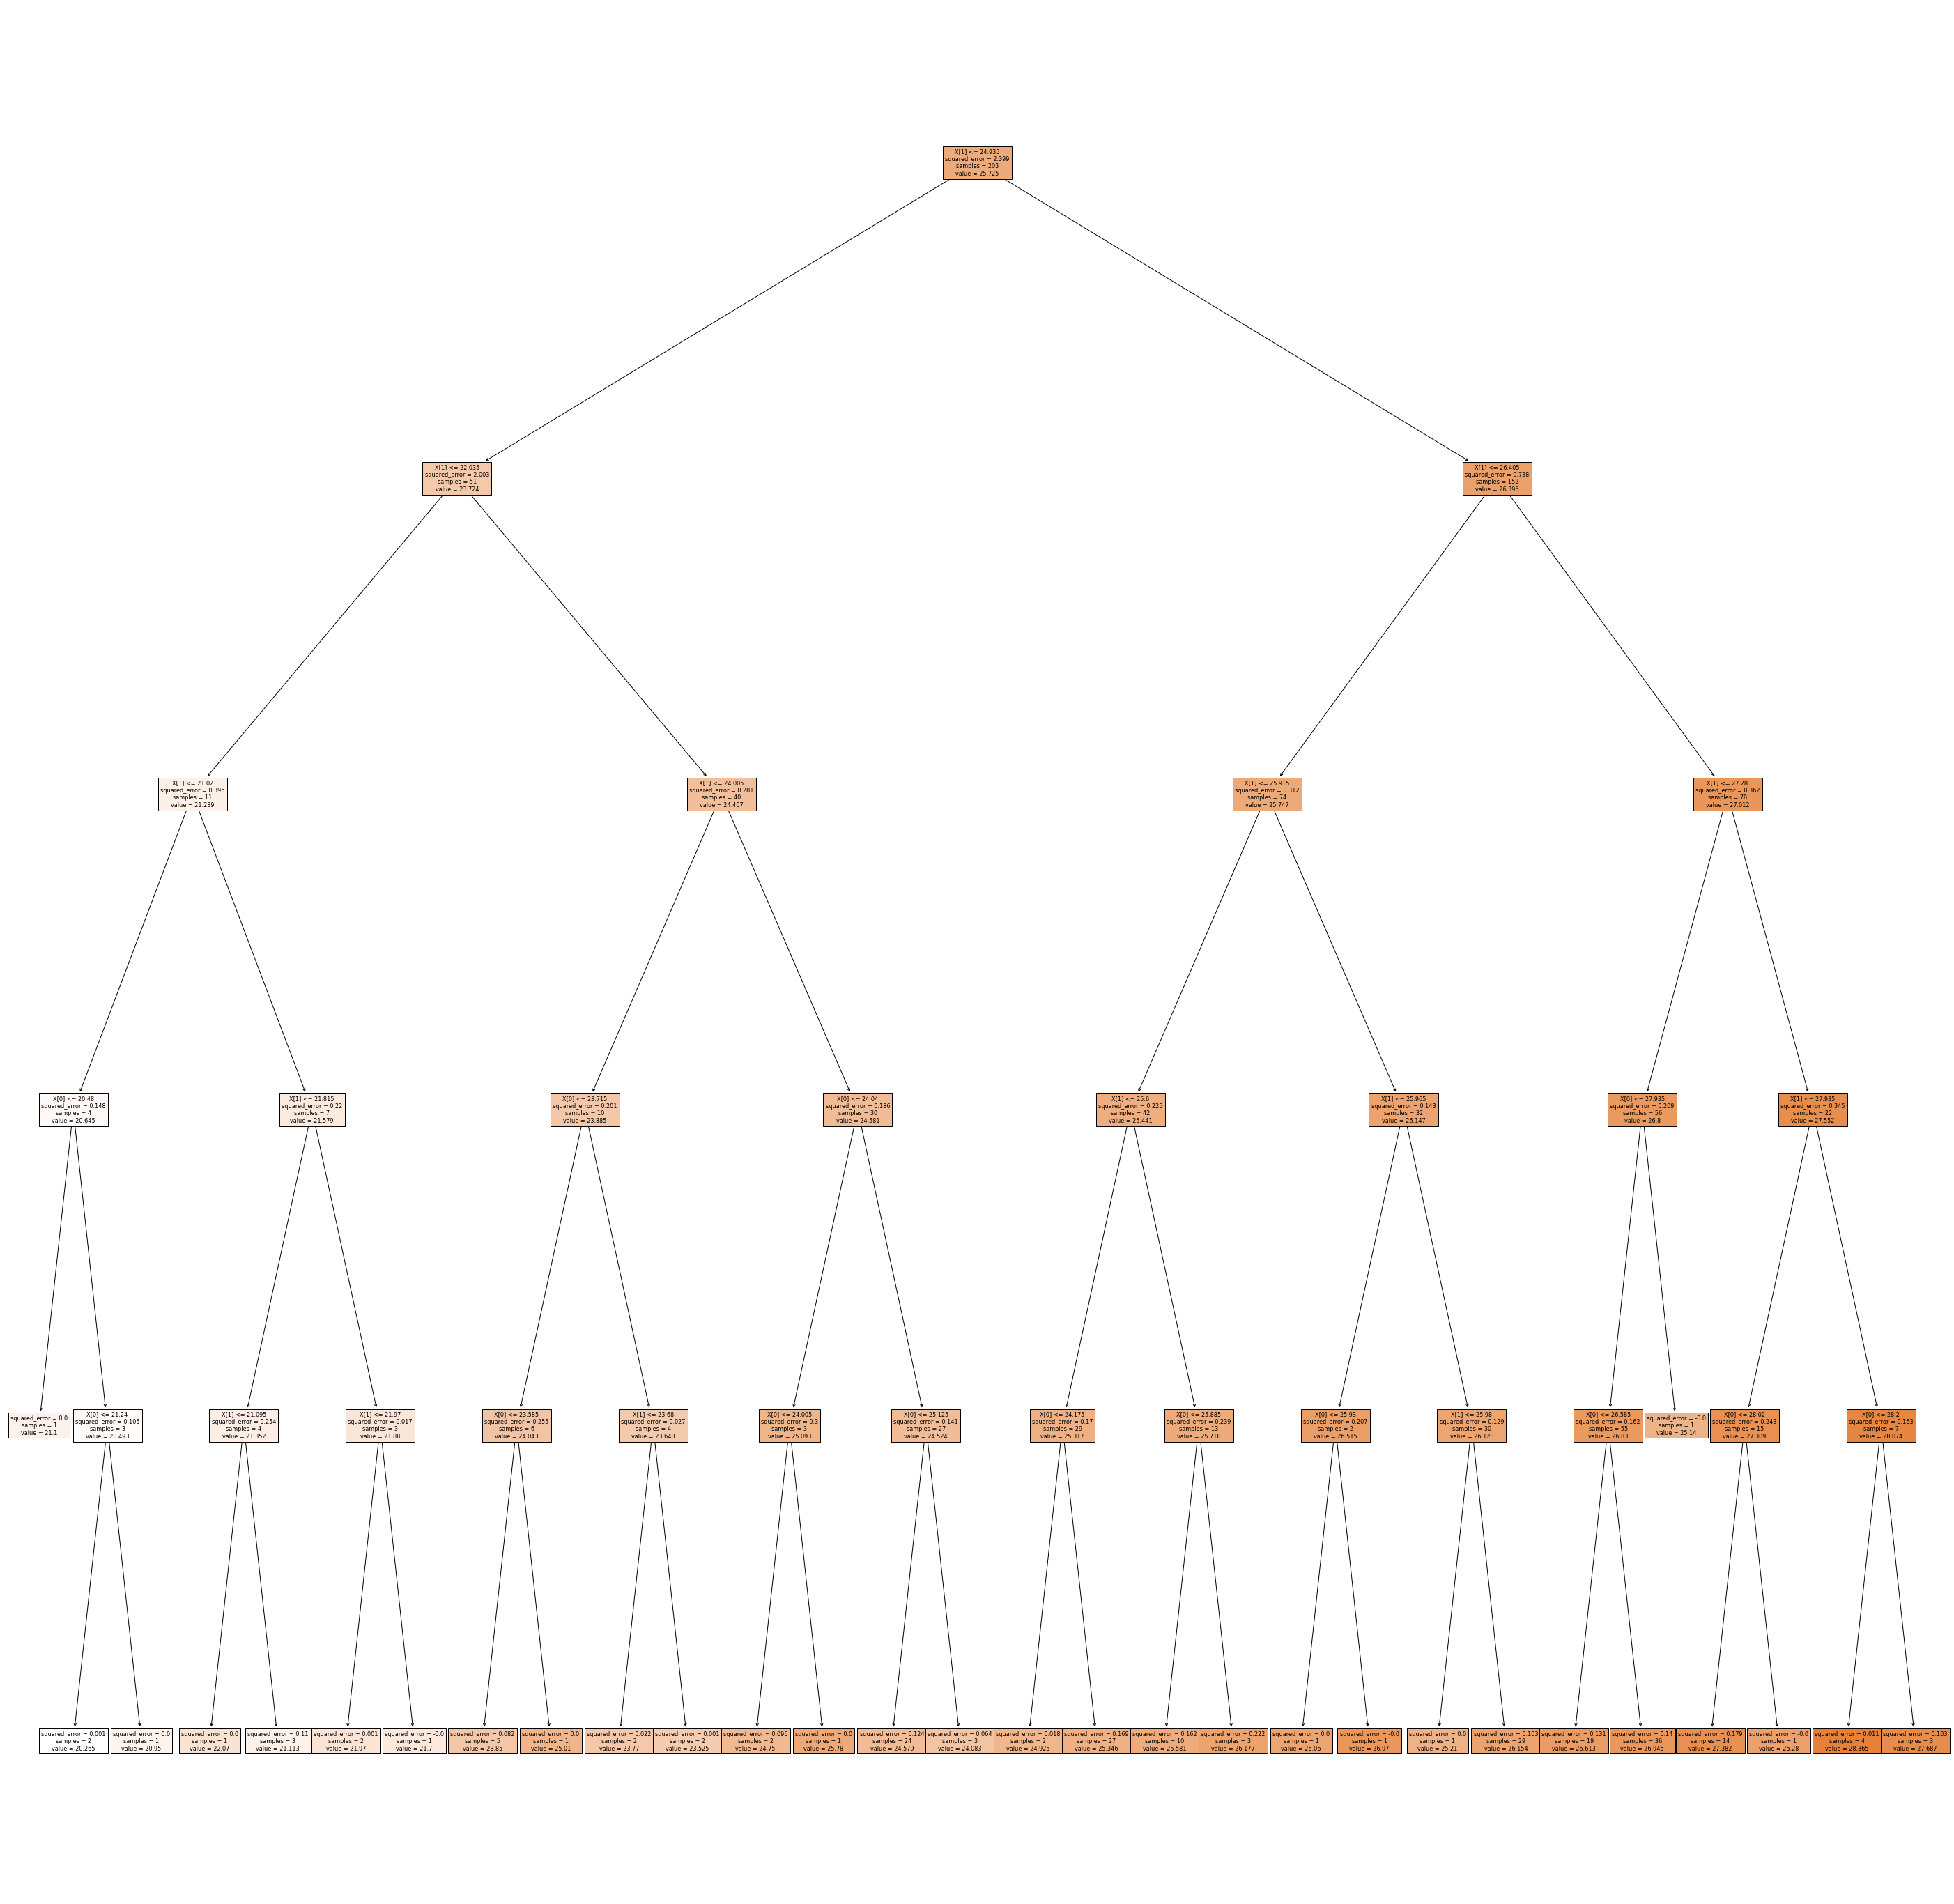

In [75]:
from sklearn.tree import plot_tree

plt.rcParams['figure.figsize'] = (50, 50)
plot_tree(dtr, filled=True);